In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook",font_scale=1.5)
sns.set_palette('viridis')
plt.rcParams['figure.figsize']=(12,6)

In [3]:
try:
    df = pd.read_csv("Dataset.csv")
    print("Initial dataset shape:", df.shape)
    print("Dtaset info:")
    display(df.info())
    display(df.head())
except Exception as e:
    print(f"an error occureed: {e} ")

Initial dataset shape: (9551, 21)
Dtaset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     955

None

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:

missing=(df.isnull().sum())
missing=missing[missing<0].sort_values(ascending=False)
if(len(missing)>0):
    print(f"there are missing values")
else:
    print(f"no missing values")


no missing values


In [5]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

C:\Users\abint\AppData\Local\Temp\ipykernel_8108\705941774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)


In [6]:
categorical_features=['Has Table booking','Has Online delivery','Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text','City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency','Address']
data_encoded=pd.get_dummies(df,columns=categorical_features,drop_first=True )

In [7]:
X=data_encoded.drop('Aggregate rating',axis=1)
y=data_encoded['Aggregate rating']
text_columns=['Restaurant Name','Adress']
X_numeric=X.drop(columns=text_columns,errors='ignore')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Trainig set shape:{X_train.shape}")
print(f"Testing set shape:{X_test.shape}")

Trainig set shape:(7640, 13384)
Testing set shape:(1911, 13384)


In [8]:
X_train_numeric = X_train.drop(columns=text_columns, errors='ignore')
X_test_numeric = X_test.drop(columns=text_columns, errors='ignore')

In [9]:

non_numeric_cols = X_train_numeric.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train_numeric:", non_numeric_cols.tolist())


Non-numeric columns in X_train_numeric: []


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_numeric, y_train)
y_pred = linear_model.predict(X_test_numeric)
r2 = r2_score(y_test, y_pred)


In [ ]:
feature_importance=pd.DataFrame({'Feature':X_train_numeric.columns,'Coefficient':linear_model.coef_})

In [ ]:
print(f"Model Perfomance")
print(f"R² Score: {r2:.2f}")

Model Perfomance
R² Score: 0.97


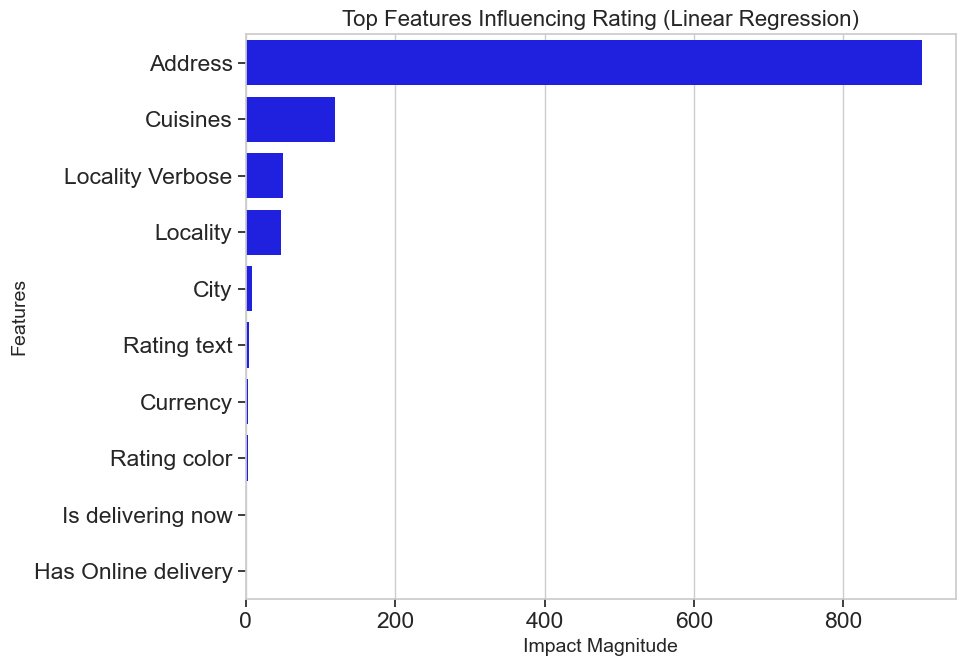

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train_numeric.columns,
    'Coefficient': linear_model.coef_
})
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()

feature_importance['Base_Feature'] = feature_importance['Feature'].str.split('_').str[0]
grouped_importance = (
    feature_importance
    .groupby('Base_Feature')['Absolute_Coefficient']
    .sum()
    .sort_values(ascending=False)
)

top_grouped = grouped_importance.head(10)

plt.figure(figsize=(10, 7))
sns.barplot(x=top_grouped.values, y=top_grouped.index, color='blue')
plt.title("Top Features Influencing Rating (Linear Regression)", fontsize=16)
plt.xlabel("Impact Magnitude", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()


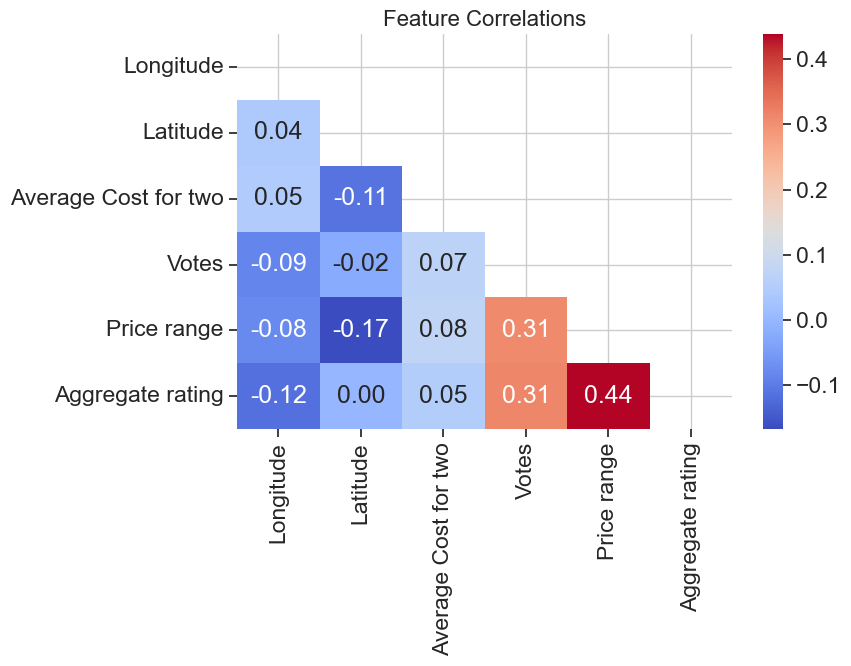

In [ ]:
numeric_columns=['Longitude','Latitude','Average Cost for two','Votes','Price range','Aggregate rating']
df_numeric=df[numeric_columns]
plt.figure(figsize=(9,7))
corr_matrix=df_numeric.corr()
mask=np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f",mask=mask)
plt.title("Feature Correlations",fontsize=16)
plt.tight_layout()
plt.show()